In [1]:
# Importing Libaray that are essential and it will use to build model


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Building Model to predict Players ratings with the help of pipeline
**Start with tabular analysis.
Data visualisation.
Training and Testing the Data,by taking value of train_size = 0.2 ,"means 20 percent of 100 percent data"
**Created Pipeline to make our model building process easy by taking step by step 
> Simple Imputer to replace NaN value in model or user forget to gave data to particular column
then,it replace it by mean or median 
OneHotEncoding is also used in this model.
Fitting the model to transform the data.
Creating model to predct the rating of players by Importing Joblib library
Using model to predict the players Rating by giving user input
******

In [2]:
df = pd.read_csv("/kaggle/input/football-players-datasets-2015-2024/Latest Football  Players 2024 Data.csv")

# Tabular Analysis

In [3]:
df.head()

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64  
 6   Seasons Ratings  1216 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 66.6+ KB


In [5]:
df.describe()

,Matches,Goals,Assists,Seasons Ratings
count,1216.000000,1216.000000,1216.000000,1216.000000
mean,37.024671,8.059211,4.797697,7.111595
std,11.762088,9.351558,4.496019,0.410907
min,1.000000,0.000000,0.000000,5.100000
25%,31.000000,2.000000,1.000000,6.900000
50%,39.000000,4.000000,4.000000,7.100000
75%,46.000000,12.000000,7.000000,7.300000
max,59.000000,55.000000,25.000000,8.900000


In [6]:
df.isnull().sum()

Teams              0
Seasons            0
Players            0
Matches            0
Goals              0
Assists            0
Seasons Ratings    0
dtype: int64

# DATA VISUALISATION
> Gaining import information from analysis 

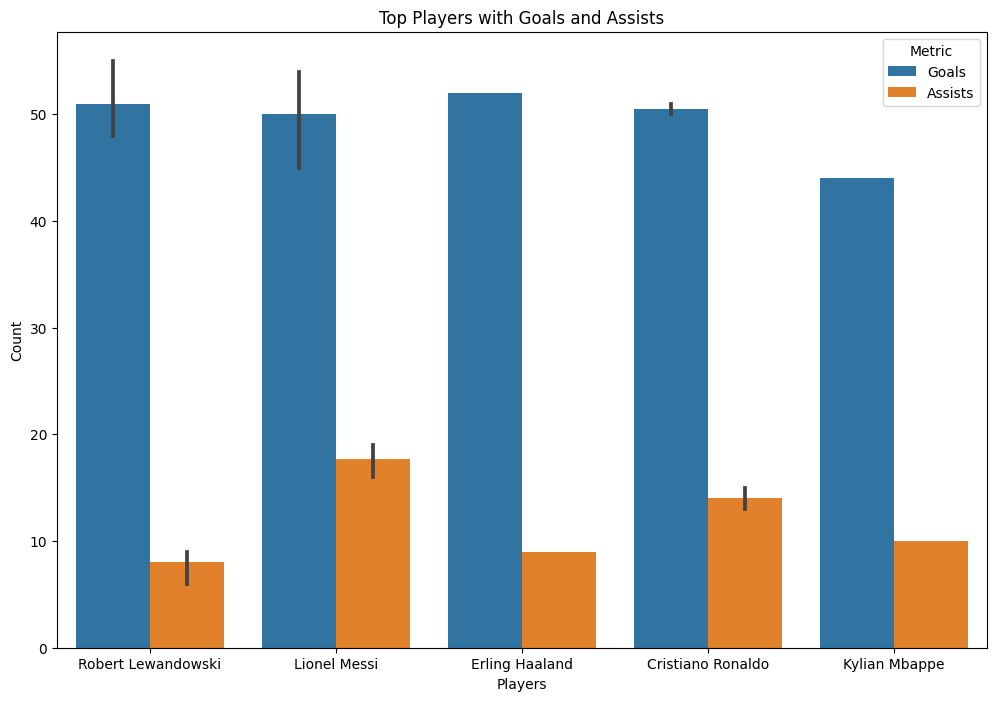

In [7]:
# Assuming 'df' is your DataFrame
top_players = df.nlargest(10, 'Goals')  # Get the top 10 players with the most goals

# Melt the DataFrame to have a long format
melted_top_players = top_players.melt(id_vars=['Players'], value_vars=['Goals', 'Assists'], 
                                      var_name='Metric', value_name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Players', y='Count', hue='Metric', data=melted_top_players)
plt.xlabel("Players")
plt.ylabel('Count')
plt.title('Top Players with Goals and Assists')
plt.legend(title='Metric')
plt.show()


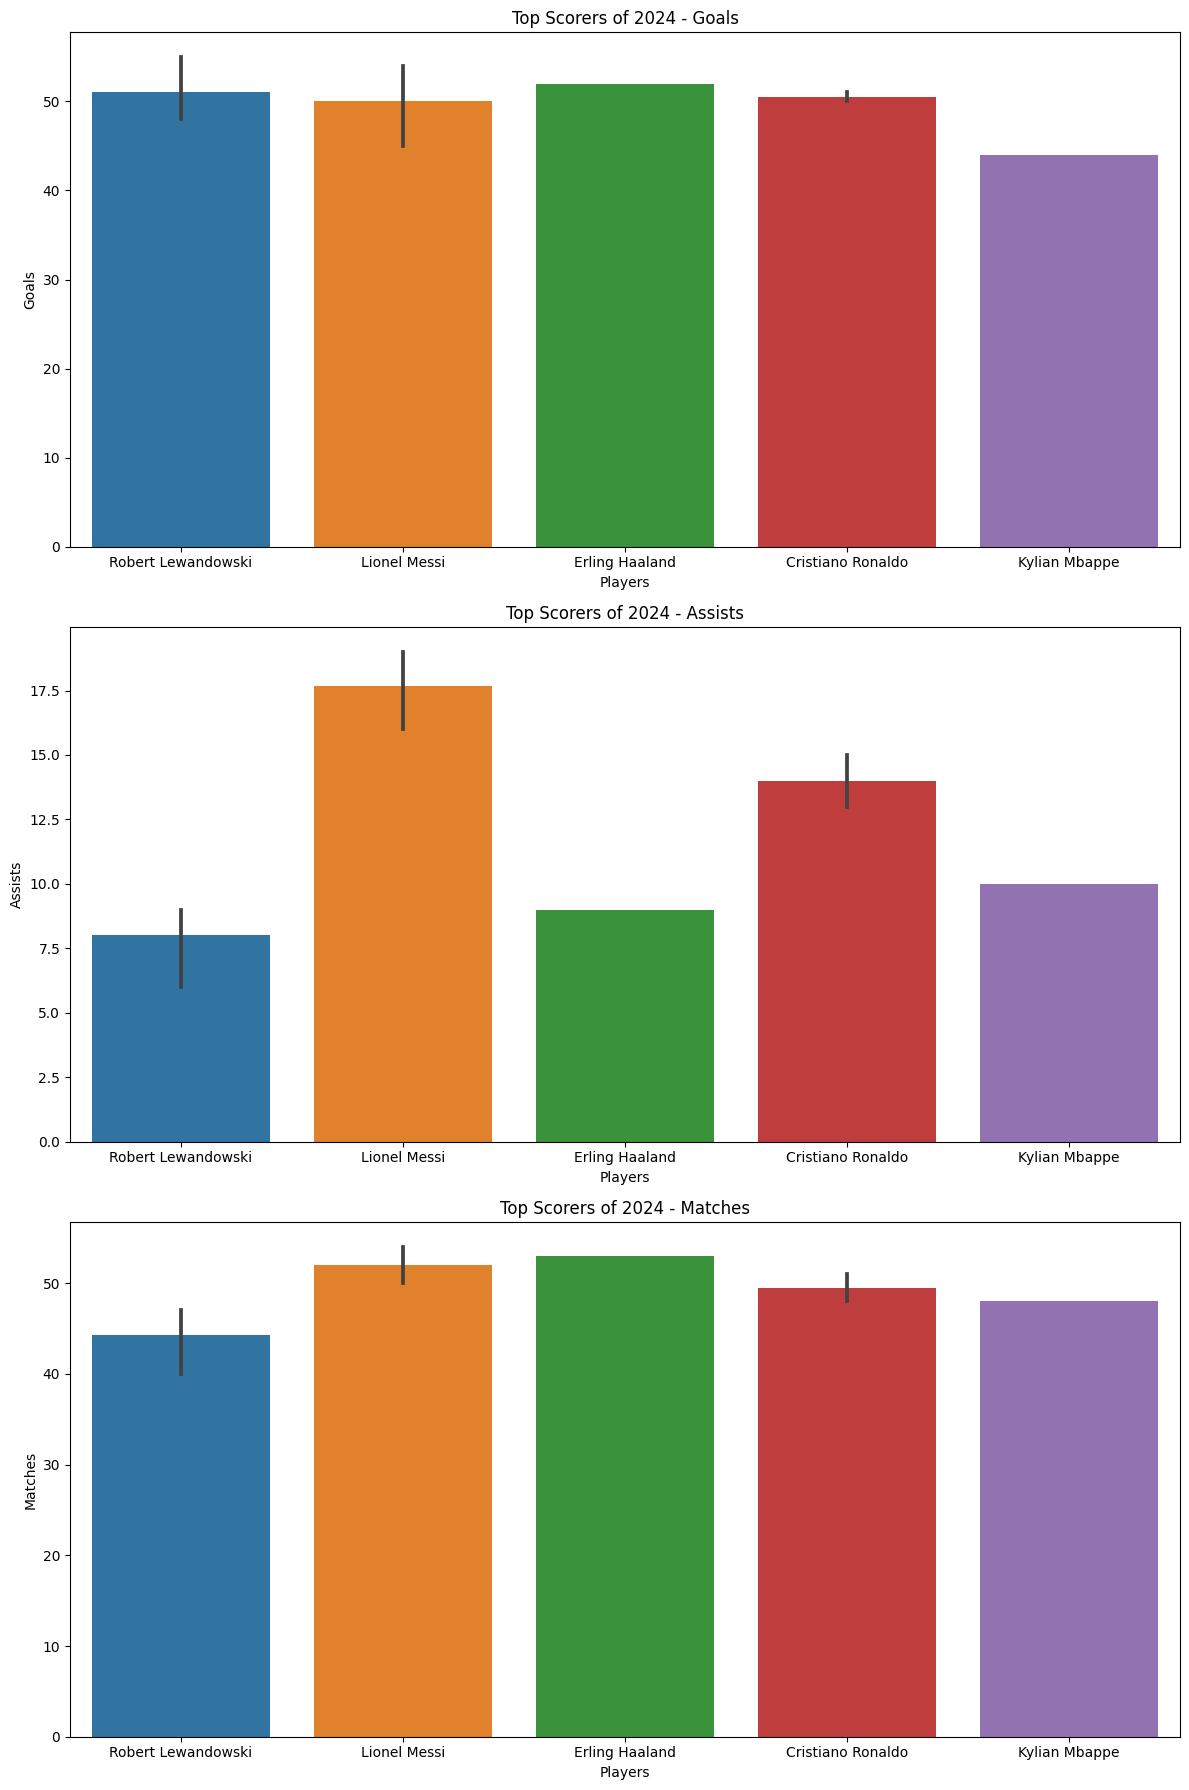

In [8]:
# Assuming 'df' is your DataFrame
top_players = df.nlargest(10, 'Goals')  # Get the top 10 players with the most goals

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot Goals
sns.barplot(ax=axes[0], x='Players', y='Goals', data=top_players)
axes[0].set_title('Top Scorers of 2024 - Goals')
axes[0].set_xlabel('Players')
axes[0].set_ylabel('Goals')

# Plot Assists
sns.barplot(ax=axes[1], x='Players', y='Assists', data=top_players)
axes[1].set_title('Top Scorers of 2024 - Assists')
axes[1].set_xlabel('Players')
axes[1].set_ylabel('Assists')

# Plot Matches
sns.barplot(ax=axes[2], x='Players', y='Matches', data=top_players)
axes[2].set_title('Top Scorers of 2024 - Matches')
axes[2].set_xlabel('Players')
axes[2].set_ylabel('Matches')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


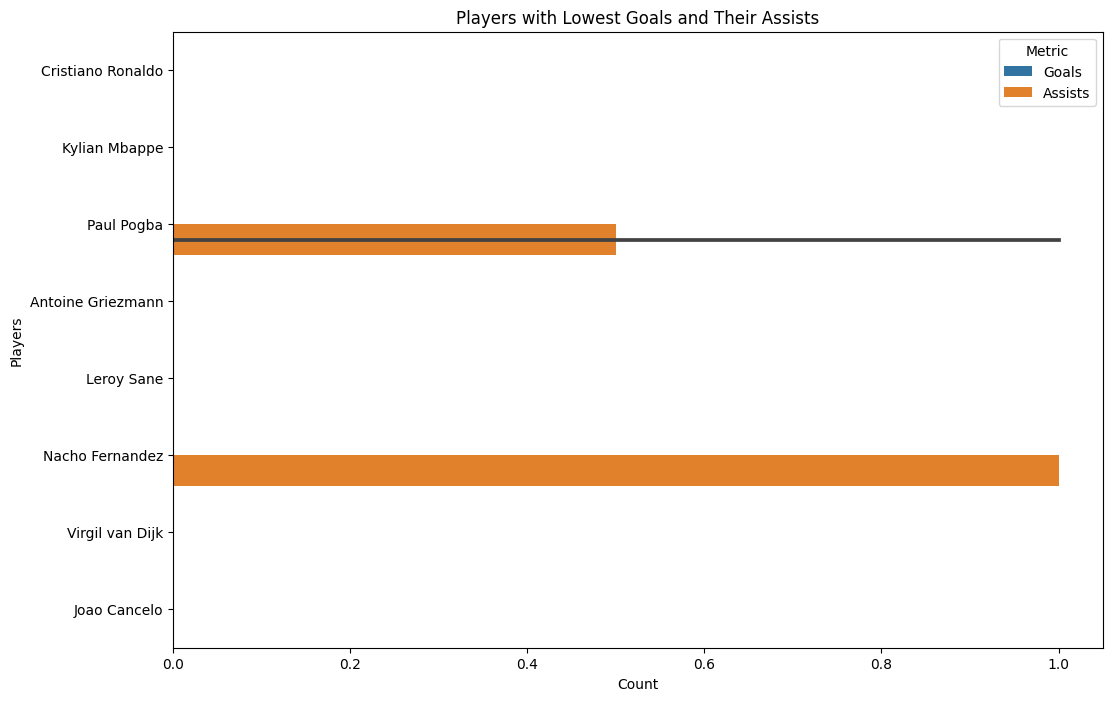

In [9]:
# Assuming 'df' is your DataFrame
# Get the players with the lowest goals (change the 10 to the number of players you want)
bottom_players = df.nsmallest(10, 'Goals')

# Melt the DataFrame to have a long format
melted_bottom_players = bottom_players.melt(id_vars=['Players'], value_vars=['Goals', 'Assists'], 
                                            var_name='Metric', value_name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(y='Players', x='Count', hue='Metric', data=melted_bottom_players, orient='h')
plt.ylabel("Players")
plt.xlabel('Count')
plt.title('Players with Lowest Goals and Their Assists')
plt.legend(title='Metric')
plt.show()


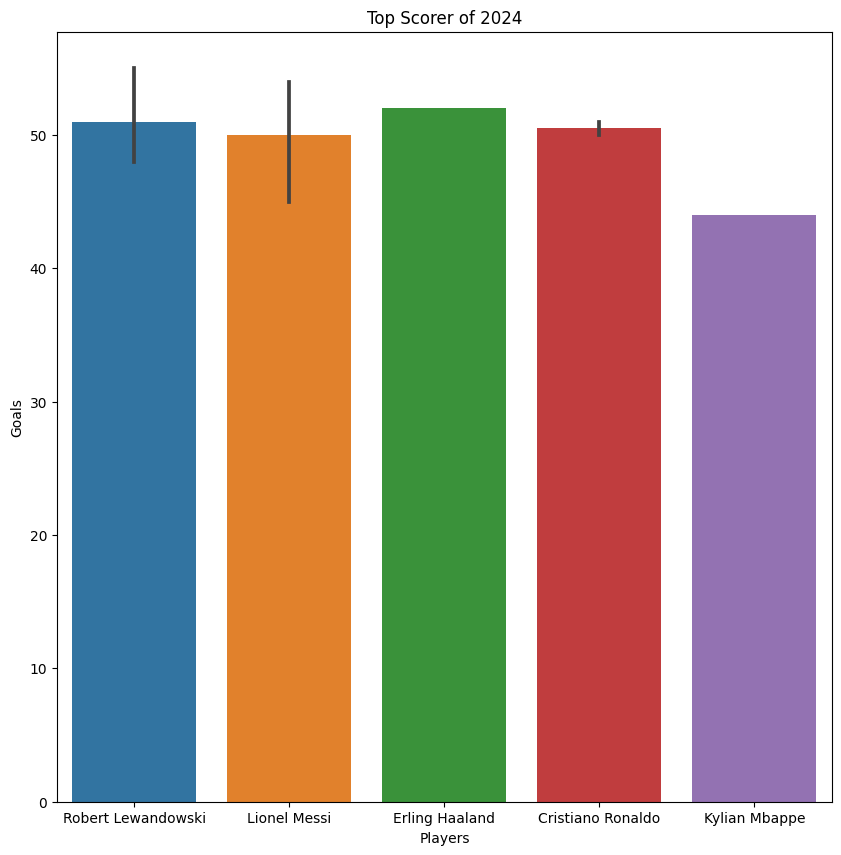

In [10]:
# Assuming 'df' is your DataFrame
top_players = df.nlargest(10, 'Goals')  # Get the top 10 players with the most goals

plt.figure(figsize=(10, 10))
sns.barplot(x='Players', y='Goals', data=top_players)
plt.xlabel("Players")
plt.ylabel('Goals')
plt.title('Top Scorer of 2024')
plt.show()


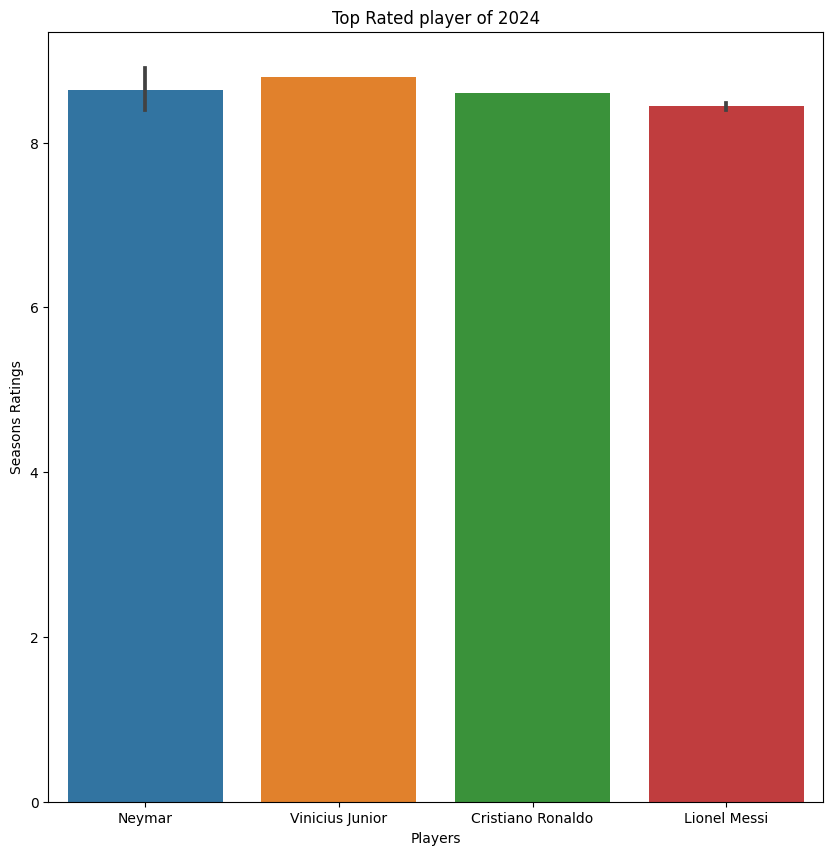

In [11]:
# Assuming 'df' is your DataFrame
top_players = df.nlargest(10, 'Seasons Ratings')  # Get the top 10 players with the most goals

plt.figure(figsize=(10, 10))
sns.barplot(x='Players', y='Seasons Ratings', data=top_players)
plt.xlabel("Players")
plt.ylabel('Seasons Ratings')
plt.title('Top Rated player of 2024')
plt.show()


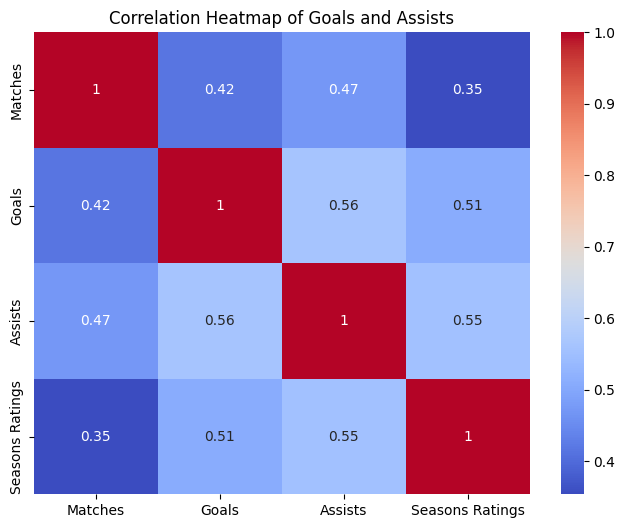

In [12]:
# Selecting only numerical columns for the heatmap
numerical_df = df[['Matches','Goals','Assists'           
,'Seasons Ratings']]

plt.figure(figsize=(8, 6))
sns.heatmap(data=numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Goals and Assists')
plt.show()


**Dropped the column **

In [13]:
df=df.drop(columns=['Seasons'])

In [14]:
X = df.drop(columns=['Seasons Ratings'])
y = df['Seasons Ratings']

# Training and Testing the data. Ensure our data predict proper after testing it. 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)
X_train,y_train

(                  Teams          Players  Matches  Goals  Assists
 432             Sevilla     Jules Kounde       44      3        1
 277             Chelsea      Kai Havertz       47     14        5
 721            Man City    Manuel Akanji       48      4        0
 991     Atletico Madrid    Thomas Partey       24      1        4
 678     Atletico Madrid  Rodrigo De Paul       48      4        1
 ...                 ...              ...      ...    ...      ...
 1044          Wolfsburg   Victor Osimhen       13      0        0
 1095           Juventus    Adrien Rabiot       45      0        2
 1130           Brighton       Lewis Dunk       39      1        1
 860   Linares Deportivo     Fermin Lopez       40     12        0
 1126           Brighton       Lewis Dunk       31      1        0
 
 [972 rows x 5 columns],
 432     7.3
 277     7.1
 721     7.2
 991     6.7
 678     7.1
        ... 
 1044    5.8
 1095    7.2
 1130    6.7
 860     6.1
 1126    6.9
 Name: Seasons Ratings, Le

# Using Pipeline to split data into step to make proper work

In [16]:
categorical_features = ['Players', 'Teams']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
numerical_features = ['Matches','Goals','Assists']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [18]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
# Create the full pipeline with a model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [20]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Matches', 'Goals',
                                                   'Assists']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Players', 'Teams'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.09012114341416196


In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [None, 10, 20, 30]
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best parameters: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 300}


# Created model that will come in use to make prediction based on user input. 

In [23]:
import joblib

joblib.dump(model, 'player_rating_model.pkl')

['player_rating_model.pkl']

In [24]:
model = joblib.load('player_rating_model.pkl')

# Using the model 

In [25]:
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error

# Load the saved model
model = joblib.load('player_rating_model.pkl')

# Sample Data taken from existing data to ensure it model wroking correctly, for further predictions.

In [26]:
# Example of new data
new_data = pd.DataFrame({
    'Players': ['Neymar', 'Ronaldo'],
    'Matches': [40, 50],
    'Goals': [50, 53],
    'Assists': [45, 48],
    'Teams': ['PSG', 'AL NASSR']
})

In [27]:
# Ensure the new data has the same format
print(new_data)

   Players  Matches  Goals  Assists     Teams
0   Neymar       40     50       45       PSG
1  Ronaldo       50     53       48  AL NASSR


In [28]:
# Make predictions on the new data
new_predictions = model.predict(new_data)

# Here model gave the prediction based existing data input given to it.

In [29]:
# Print the predictions
print('Predicted Ratings:', new_predictions)

Predicted Ratings: [8.369 8.238]


In [30]:
# Assuming you have the actual ratings for the new data
actual_ratings = [8.3,8.2]  # Example actual ratings

In [31]:
# Evaluate the predictions
mse_new = mean_squared_error(actual_ratings, new_predictions)
print(f'Mean Squared Error on new data: {mse_new}')

Mean Squared Error on new data: 0.0031025000000006503


# For more understanding,I have given an input as user to model to see whether model predict the rating based on my own input or not. 

In [32]:
new = pd.DataFrame({'Players':["Sunil Chhetri"],'Matches':[30],'Goals':[45],'Assists':[40],'Teams':['Bengaluru FC']})

In [33]:
print(new)

         Players  Matches  Goals  Assists         Teams
0  Sunil Chhetri       30     45       40  Bengaluru FC


# I have created an object and passed the input into it by using FUNCTION(PREDICT)

In [34]:
new_prediction = model.predict(new)

# Model gave the ,'Rating of the player'.which i gave as input.

In [35]:
new_prediction

array([8.171])